<a href="https://colab.research.google.com/github/satyam-tomar/neural-networks/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Neural Network from Scratch

Neural networks are computational models inspired by the way the human brain processes information. At their core, they consist of layers of interconnected units (neurons) that transform input data into meaningful outputs through a series of mathematical operations.

Most modern libraries abstract these details away. In this notebook, we intentionally avoid high-level frameworks to understand what *actually* happens inside a neural network. By building everything from scratch, we gain clarity on how data flows forward, how errors are calculated, and how parameters are updated during learning.

We will proceed step by step. Each code block will introduce a new concept, and every explanation will build directly on what we implemented previously. By the end, you will have a working neural network and a clear mental model of how it functions internally.

![Neural Network Architecture](https://t3.ftcdn.net/jpg/10/99/99/02/360_F_1099990223_yKFUPf2Mtvm3n9fY78GTLVvbBSGloSXC.jpg)

*The diagram above represents a simple feedforward neural network with an input layer, hidden layer(s), and an output layer. Data flows from left to right during the forward pass.*


## Single Neuron: Manual Forward Pass

Before building full layers or networks, we start with the smallest possible unit: a single neuron. A neuron takes multiple inputs, multiplies each input by an associated weight, sums the results, and then adds a bias. This entire operation is called the **forward pass**.

Mathematically, a neuron computes:

\[
\text{output} = \sum_{i=1}^{n} (x_i \cdot w_i) + b
\]

where \(x_i\) are the inputs, \(w_i\) are the weights, and \(b\) is the bias.

In the code below, `inputs` represents the data coming into the neuron, `weights` control the influence of each input, and `bias` shifts the final result. We explicitly multiply each input by its corresponding weight and add the bias to produce a single numeric output.

This step is intentionally written in a very manual way. By avoiding loops or libraries for now, we make the neuron’s computation completely transparent, which will help when we later generalize this logic to vectors, matrices, and entire layers.


In [ ]:
inputs = [1,2,3]
weights = [0.1, 0.2, 0.3]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(output)

3.4


## Extending to a Layer of Neurons

In the previous step, we implemented the forward pass for a single neuron. Now, we extend the same idea to a **layer of neurons**. A layer simply means that the same input is processed in parallel by multiple neurons, each with its own set of weights and its own bias.

Here, the `inputs` remain the same, but we introduce three different weight vectors: `weights1`, `weights2`, and `weights3`. Each weight vector corresponds to a separate neuron in the layer. Similarly, each neuron has its own bias term (`bias1`, `bias2`, and `bias3`).

Each neuron performs the same operation we saw earlier:

\[
\text{neuron output} = \sum (x_i \cdot w_i) + b
\]

The difference is that we now compute this equation three times—once per neuron—and collect all results into a single list called `output`. This list represents the **output of the entire layer**, not just one neuron.

Conceptually, this is a crucial step. Instead of thinking in terms of one neuron, we are now building a structure that can extract multiple features from the same input simultaneously. In the next steps, we will simplify and generalize this logic using loops and matrix operations, which is how neural network libraries handle layers internally.


In [ ]:
inputs = [1,2,3,2.5]
weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[2]*weights1[3] + bias1,
          inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[2]*weights2[3] + bias2,
          inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[2]*weights3[3] + bias3]

print(output)

[5.3, 0.96, 2.82]


## Generalizing a Layer Using Loops

In the previous example, we manually wrote the computation for each neuron, which quickly becomes repetitive and error-prone as the number of neurons grows. In this step, we refactor the same logic using loops so the code can scale naturally.

We now store all neuron weights inside a single 2-D list called `weights`, where each inner list represents the weight vector of one neuron. The `biases` list stores the bias for each corresponding neuron. This structure mirrors how neural network layers are represented internally.

The outer loop iterates over each neuron by pairing its weight vector with its bias. For every neuron, we initialize `neural_output` to zero and compute the weighted sum by looping over inputs and weights together. After summing all input-weight products, we add the neuron’s bias and store the result in `layer_output`.

Mathematically, this code is still performing the same operation:

\[
\text{layer output}_j = \sum_i (x_i \cdot w_{ij}) + b_j
\]

The key improvement here is abstraction. We are no longer hardcoding neuron calculations. This makes the layer reusable for any number of inputs or neurons, setting the foundation for moving toward vectorized and matrix-based implementations in the next steps.


In [ ]:
inputs = [1,2,3,2.5]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2,3,0.5]

layer_output = []
for neuron_weights, neuron_bias in zip(weights, biases):
  neural_output = 0
  for n_input, weight in zip(inputs, neuron_weights):
    neural_output += n_input*weight
  neural_output += neuron_bias
  layer_output.append(neural_output)

print(layer_output)



[4.8, 1.21, 2.385]


## Understanding Weights vs Bias: Scaling and Shifting

Up to this point, we have focused on how weights and biases are used together inside a neuron. This small example isolates their roles to make the intuition clear. A **weight** controls how strongly an input value influences the output, while a **bias** shifts the output independently of the input.

When we multiply `some_value` by `weights`, we are scaling the input. A negative weight, as shown here, can flip the sign of the value, which is how neurons learn inverse relationships. In contrast, adding a bias does not depend on the input magnitude; it simply moves the output up or down.

Mathematically, these two operations represent the core neuron behavior:

\[
\text{weighted input} = x \cdot w \quad \text{and} \quad \text{shifted output} = x + b
\]

This separation is important conceptually. During training, weights learn *how much* an input matters, while biases learn *where* the activation threshold should lie.


In [ ]:
inputs = [1,2,3,2.5]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2,3,0.5]

some_value = 0.5
weights = -0.7
bias = 0.7

print(some_value*weights)
print(some_value+bias)

-0.35
1.2


## Using Vectorized Operations with NumPy

So far, we have computed neuron outputs using explicit loops and manual summation. While this approach is useful for understanding, it is not efficient or practical for real neural networks. This step introduces **NumPy**, which allows us to express the same computation using vectorized operations.

Here, both `inputs` and `weights` are treated as vectors. The `np.dot(weights, inputs)` operation computes the sum of element-wise products between the two vectors, which is exactly the weighted sum we previously implemented using loops. Adding the bias completes the neuron’s forward pass.

Mathematically, this is the same neuron equation written in compact form:

\[
\text{output} = \mathbf{w} \cdot \mathbf{x} + b
\]

This vectorized formulation is critical for performance. Neural network libraries rely heavily on such operations to process large amounts of data efficiently, especially when scaling from single neurons to entire layers and batches of inputs.


In [ ]:
import numpy as np

inputs = [1,2,3,2.5]

weights = [0.2, 0.8, -0.5, 1.0]

bias = 2

output = np.dot(weights, inputs) + bias
print(output)



4.8


## Vectorizing an Entire Layer

Previously, we used a loop combined with `np.dot` to compute the output of each neuron one by one. While correct, that approach still treats neurons individually. NumPy allows us to go one step further and compute the output of an **entire layer in a single operation**.

In this code, `weights` is a 2-D matrix where each row represents the weights of one neuron, and `inputs` is a single input vector. The operation `np.dot(weights, inputs)` performs multiple dot products at once—one for each neuron—resulting in a vector of weighted sums.

When we add `biases`, NumPy applies the addition element-wise, adding the correct bias to each neuron’s output. The result stored in `output` is the same as the loop-based implementation, but written in a much more compact and efficient form.

Mathematically, this corresponds to:

\[
\mathbf{output} = W \cdot \mathbf{x} + \mathbf{b}
\]

This formulation is the standard way neural network layers are implemented. From this point onward, we can scale to many neurons and inputs without changing the core logic, which is essential for building deep networks.


In [ ]:
import numpy as np

inputs = [1,2,3,2.5]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2,3,0.5]

# layer_output = []
# for neuron_weights, neuron_bias in zip(weights, biases):
#   neural_output = np.dot(neuron_weights, inputs) + neuron_bias
#   layer_output.append(neural_output)
# print(layer_output)


output = np.dot(weights, inputs) + biases
print(output)

[4.8   1.21  2.385]


## Processing a Batch of Inputs

Up to this point, all computations assumed a single input sample. In practice, neural networks are trained and evaluated on **batches of inputs**, not one input at a time. This step extends the same layer computation to handle multiple input samples simultaneously.

Here, `inputs` is now a 2-D array where each row represents one input sample and each column represents a feature. The `weights` matrix still represents the layer’s neurons, but to align dimensions correctly, we transpose it using `.T`. This allows each input sample to be multiplied against all neuron weight vectors at once.

The operation `np.dot(inputs, weights.T)` computes the weighted sums for every input–neuron combination. Adding `biases` applies the bias to each neuron output for every sample through NumPy’s broadcasting mechanism.

Mathematically, this is expressed as:

\[
\mathbf{Output} = X \cdot W^{T} + \mathbf{b}
\]

The result is a matrix where each row corresponds to one input sample and each column corresponds to one neuron’s output. This batching approach is fundamental for efficient training, as it enables parallel computation and better utilization of hardware.


In [ ]:
import numpy as np

inputs = [[1,2,3,2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2,3,0.5]

output = np.dot(inputs , np.array(weights).T) +biases
print(output)


[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
this is the output of neural network


## Stacking Layers to Form a Neural Network

So far, we have built and executed a single layer that processes batched inputs. A neural network emerges when we **stack multiple layers**, where the output of one layer becomes the input to the next.

In this code, `layer1_output` represents the result of the first layer applied to the input batch. This output is no longer raw input data; it is a transformed representation learned through the first set of weights and biases.

We then introduce a second layer with its own parameters, `weights2` and `biases2`. The computation for `layer2_output` follows the exact same pattern as before, but now the dot product operates on `layer1_output` instead of the original inputs. This shows an important property of neural networks: each layer applies the same mathematical operation, regardless of depth.

Mathematically, the two-layer forward pass can be written as:

\[
\mathbf{L_1} = X \cdot W_1^{T} + \mathbf{b_1}
\]
\[
\mathbf{L_2} = \mathbf{L_1} \cdot W_2^{T} + \mathbf{b_2}
\]

At this stage, the network is purely linear. In the next step, we will introduce activation functions, which allow the network to model non-linear relationships and significantly increase its expressive power.


In [ ]:
import numpy as np

inputs = [[1,2,3,2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2,3,0.5]

weights2 = [[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]

biases2 = [-1,2,-0.5]

layer1_output = np.dot(inputs , np.array(weights).T) +biases

layer2_output = np.dot(layer1_output, np.array(weights2).T) + biases2

print(layer2_output)



[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


## Creating Reusable Dense Layer Objects

Until now, we have manually defined weights, biases, and forward-pass logic for each layer. This works for learning, but it quickly becomes unmanageable as networks grow. In this step, we encapsulate that logic inside a **Dense (fully connected) layer class**, which is how real neural network frameworks are structured.

The `Layer_Dense` class initializes its own weights and biases based on the number of inputs and neurons. We scale the randomly generated weights by `0.10` to keep initial values small, which helps stabilize early computations. Biases are initialized to zero, allowing the network to learn necessary shifts during training.

The `forward` method defines the forward pass. It performs the familiar matrix multiplication between inputs and weights, then adds the bias vector. The result is stored in `self.output`, making it available to subsequent layers.

By creating `layer1` and `layer2`, we stack two dense layers together. The output of `layer1` becomes the input to `layer2`, forming a simple feedforward neural network. This object-oriented structure is a major milestone—it allows us to build deep networks by composing reusable components, setting the stage for adding activation functions and learning algorithms next.


In [ ]:
import numpy as np

np.random.seed(0)

X = [[1,2,3,2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

layer1.forward(X)
print(layer1.output)
layer2.forward(layer1.output)
print(layer2.output)



[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


## Introducing the ReLU Activation Function

So far, every layer we built performs only linear transformations. While stacking linear layers increases dimensionality, it does not allow the network to model complex patterns. To address this, we introduce **activation functions**, which add non-linearity to the network.

The Rectified Linear Unit (ReLU) is one of the most commonly used activation functions. It is defined as:

\[
\text{ReLU}(x) = \max(0, x)
\]

In this code, we apply ReLU to a list of input values. Any positive value passes through unchanged, while any zero or negative value is clipped to zero. The commented block shows the explicit conditional logic, and the final implementation uses Python’s `max` function for clarity and conciseness.

ReLU is computationally simple and helps mitigate issues like vanishing gradients in deeper networks. In the next step, we will integrate this activation function directly into our layer-based neural network.


In [ ]:
# ReLU activation function

inputs = [0,2,-1, 3.3, -2.7, 1.1, 2.2, -100]
output =[]

# for i in inputs:
#   if i > 0:
#     output.append(i)
#   elif i<=0:
#     output.append(0)

for i in inputs:
  output.append(max(0,i))

print(output)



[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [2]:
!pip install nnfs

## Combining Dense Layers with ReLU Activation

We now integrate what we have learned: **dense layers** and **activation functions**. This combination forms the building block of almost every neural network.

1. We start by generating a **spiral dataset** with `nnfs.datasets.spiral_data`, which gives us a challenging, non-linear dataset for classification. `X` contains the input features, and `y` contains the class labels.
2. `Layer_Dense` represents a fully connected layer with randomly initialized weights and zero biases.
3. `Activation_ReLU` implements the ReLU activation function, which introduces non-linearity to the layer’s outputs.

The workflow is:

- Compute the linear transformation with `layer1.forward(X)`.
- Apply the ReLU activation with `activation1.forward(layer1.output)`.

The final `activation1.output` contains the **activated outputs of the first layer**, ready to be passed to the next layer or output layer. By combining dense layers and activations in this modular way, we can now start building deeper networks capable of learning complex patterns in data.


In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

X, y = spiral_data(100,3)

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

layer1 = Layer_Dense(2,5)
activation1 = Activation_ReLU()

layer1.forward(X)
# print(layer1.output)
activation1.forward(layer1.output)
print(activation1.output)




[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.07817926e-01 0.00000000e+00 0.00000000e+00 8.72561932e-02
  0.00000000e+00]]


## Softmax Activation for Output Layers

For classification tasks, the network’s final layer often needs to produce **probabilities**. The **Softmax** function converts raw output scores (logits) into values between 0 and 1 that sum to 1, making them interpretable as probabilities.

The Softmax operation has two steps:

1. **Exponentiation**: Each output is exponentiated to ensure positivity:
\[
e^{x_i}
\]

2. **Normalization**: Divide each exponentiated value by the sum of all exponentiated values to produce a probability distribution:
\[
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}
\]

In the code, we first demonstrate this with a single output vector, `layer_outputs = [4.8, 1.21, 2.385]`, computing exponentials and normalizing them. Then, we extend it to a batch of outputs, showing how NumPy can apply Softmax **row-wise** using `axis=1` and `keepdims=True`.

The final `norm_values` matrix contains probability distributions for each input sample, and each row sums to 1. This makes Softmax ideal for multi-class classification problems where the network must predict one class per input.


In [ ]:
import math
import numpy as np

layer_outputs = [4.8, 1.21, 2.385]


# E = math.e
# exp_values = []
# for output in layer_outputs:
#   exp_values.append(E**output)
# print(exp_values)

# Exponention
exp_values = np.exp(layer_outputs)

# # Normalization
# norm_base = sum(exp_values)
# norm_values = []
# for value in exp_values:
#   norm_values.append(value / norm_base)

# Normalization
norm_values = exp_values / np.sum(exp_values)

# Exp + Norm = Softmax

print(norm_values)
print(sum(norm_values))



layer_outputs = [[4.8, 1.21, 2.385],
                  [8.9, -1.8, 0.2],
                  [1.41, 1.051, 0.026]]

exp_values = np.exp(layer_outputs)

print(exp_values)

# print(np.sum(layer_outputs, axis=1, keepdims=True))

norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)
print(norm_values)



[0.89528266 0.02470831 0.08000903]
0.9999999999999999
[[1.21510418e+02 3.35348465e+00 1.08590627e+01]
 [7.33197354e+03 1.65298888e-01 1.22140276e+00]
 [4.09595540e+00 2.86051020e+00 1.02634095e+00]]
[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99810905e-01 2.25406748e-05 1.66554310e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


## Building a Complete Two-Layer Neural Network with ReLU and Softmax

We now combine all the components we've built so far to create a **small, complete feedforward neural network** suitable for classification tasks:

1. **Data**: We generate a challenging 2D spiral dataset with three classes using `spiral_data(100, 3)`.
2. **First Layer**: `dense1` has 3 neurons and takes the 2-feature input. We apply **ReLU activation** to introduce non-linearity, allowing the network to model complex patterns.
3. **Second Layer**: `dense2` also has 3 neurons (matching the number of classes) and is followed by a **Softmax activation**, which converts the raw outputs (logits) into class probabilities.

The workflow is:

- `dense1.forward(X)` computes the first linear transformation.
- `activation1.forward(dense1.output)` applies ReLU.
- `dense2.forward(activation1.output)` computes the second layer’s linear transformation.
- `activation2.forward(dense2.output)` applies Softmax to produce probability distributions.

Printing `activation2.output[:5]` shows the first five samples’ predicted probabilities for each class. Each row sums to 1, making them interpretable as the network’s confidence in each class.

This structure forms the foundation of a **feedforward neural network**: linear transformations (dense layers) interleaved with non-linear activations (ReLU, Softmax), ready for training with a loss function and optimizer.


In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probablities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
    self.output = probablities

X, y = spiral_data(100, 3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])


[[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.3333183  0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]]


## Calculating Categorical Cross-Entropy Loss and Accuracy

After obtaining probabilities from a Softmax output layer, we need a way to **measure how well the network predicts the correct class**. This is done using the **categorical cross-entropy loss**.

### Categorical Cross-Entropy Loss

For a single sample:

\[
\text{loss} = - \sum_{i} y_i \cdot \log(p_i)
\]

- \(y_i\) is the true label in one-hot encoding (1 for correct class, 0 otherwise).  
- \(p_i\) is the predicted probability for class \(i\).

In the code:

- `softmax_output` contains predicted probabilities for a batch of samples.
- `class_targets` contains the correct class indices.
- `softmax_output[[0,1,2], class_targets]` selects the probability corresponding to the correct class for each sample.
- `-np.log(...)` computes the negative log likelihood for each sample.

### Accuracy

To get a quick sense of performance, we compute **accuracy**:

1. `np.argmax(softmax_output, axis=1)` finds the predicted class (highest probability) for each sample.
2. `np.mean(predictions == class_targets)` calculates the fraction of correct predictions.

This approach is standard in classification problems: Softmax provides probabilities, cross-entropy measures the loss, and accuracy gives an intuitive performance metric.


In [ ]:
# import numpy as np
# import math

# b = 5.2

# print(np.log(b))

# print(math.e**1.6486586255873816)


# import math

# softmax_output = [0.7, 0.1, 0.2]
# target_output = [1,0,0]

# loss = -(math.log(softmax_output[0])*target_output[0] +
#          math.log(softmax_output[1])*target_output[1] +
#          math.log(softmax_output[2])*target_output[2])

# print(loss)


import numpy as np

softmax_output = np.array([[0.7, 0.2, 0.1],
                  [0.5, 0.1, 0.4],
                  [0.02, 0.9, 0.08]])

class_targets = [0,1,1]

# print(softmax_output[[0,1,2], [0,0,0]])
# print(softmax_output[[0,1,2], class_targets])

print(-np.log(softmax_output[[0,1,2], [class_targets]]))



# accuracy

predictions = np.argmax(softmax_output, axis=1)
accuracy = np.mean(predictions==class_targets)
print(accuracy)


[[0.35667494 2.30258509 0.10536052]]
0.6666666666666666


## Combining Forward Pass with Loss Calculation

At this stage, we have a complete forward pass for a small neural network with **two layers**, ReLU activation, and a Softmax output. The next essential component for training is a **loss function**, which quantifies how well the network predicts the correct labels.

### Loss Classes

1. `Loss`: Base class that defines a `calculate` method. It calls the specific `forward` method of a derived loss class to compute per-sample losses and averages them to obtain the overall data loss.
2. `Loss_CategoricalCrossentropy`: Implements categorical cross-entropy for classification tasks.  

Key steps in `forward`:

- `y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)` ensures numerical stability by avoiding log(0).
- Correct class probabilities are selected depending on whether the labels are **sparse** (integer indices) or **one-hot**.
- Negative log-likelihood is computed for each sample.

### Usage

- `dense1.forward` and `activation1.forward` compute the first layer output.
- `dense2.forward` and `activation2.forward` compute the second layer output with Softmax probabilities.
- `loss_function.calculate(activation2.output, y)` computes the average categorical cross-entropy loss for the batch.

This modular setup allows us to **separate network architecture from the loss calculation**, making the code cleaner and ready for backpropagation in future steps.


In [12]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probablities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
    self.output = probablities

class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

class Loss_CategoricalCrossentropy(Loss):
  def forward(self, y_pred, y_true):
    samples = len(y_pred)
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[range(samples), y_true]
    elif len(y_true.shape) == 2:
      correct_confidences = np

    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

X, y = spiral_data(100, 3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(activation2.output, y)

print("Loss: ", loss)





[[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.3333183  0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]]
Loss:  1.098445


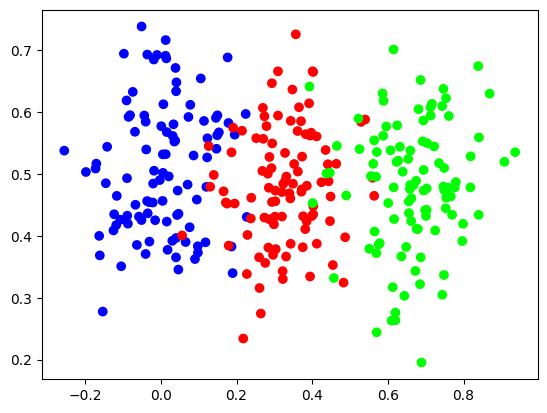

New set of weights found, iteration:  0 loss:  1.0984223 acc:  0.3333333333333333
New set of weights found, iteration:  4 loss:  1.0983797 acc:  0.3333333333333333
New set of weights found, iteration:  5 loss:  1.0973538 acc:  0.33666666666666667
New set of weights found, iteration:  6 loss:  1.0963587 acc:  0.26666666666666666
New set of weights found, iteration:  8 loss:  1.0953789 acc:  0.34
New set of weights found, iteration:  14 loss:  1.095357 acc:  0.3333333333333333
New set of weights found, iteration:  21 loss:  1.0940696 acc:  0.3333333333333333
New set of weights found, iteration:  24 loss:  1.0937893 acc:  0.3333333333333333
New set of weights found, iteration:  25 loss:  1.0903312 acc:  0.62
New set of weights found, iteration:  27 loss:  1.0894265 acc:  0.3333333333333333
New set of weights found, iteration:  28 loss:  1.0862789 acc:  0.3333333333333333
New set of weights found, iteration:  29 loss:  1.0799779 acc:  0.5933333333333334
New set of weights found, iteration:

In [13]:
import matplotlib.pyplot as plt

import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X,y = vertical_data(samples=100, classes=3)

plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_baises = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_baises = dense2.biases.copy()

for iteration in range(10000):

  dense1.weights += 0.05* np.random.randn(2,3)
  dense1.biases += 0.05* np.random.randn(1,3)
  dense2.weights += 0.05* np.random.randn(3,3)
  dense2.biases += 0.05* np.random.randn(1,3)

  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  loss = loss_function.calculate(activation2.output, y)

  predictions = np.argmax(activation2.output, axis=1)
  accuracy = np.mean(predictions==y)

  if loss < lowest_loss:
    print("New set of weights found, iteration: ", iteration, "loss: ", loss, "acc: ", accuracy)

    best_dense1_weights = dense1.weights.copy()
    best_dense1_baises = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_baises = dense2.biases.copy()
    lowest_loss = loss
  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_baises.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_baises.copy()




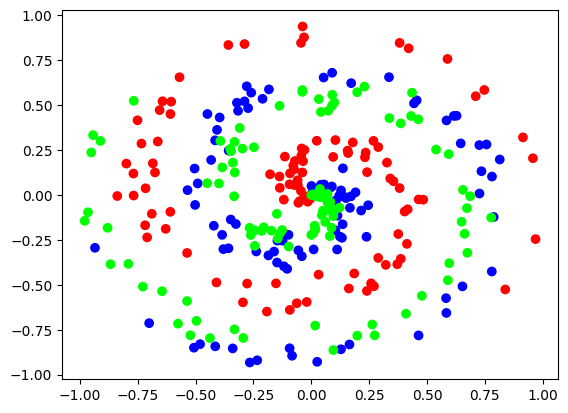

New set of weights found, iteration:  0 loss:  1.1010509 acc:  0.3333333333333333
New set of weights found, iteration:  1 loss:  1.0993538 acc:  0.3333333333333333
New set of weights found, iteration:  2 loss:  1.0988902 acc:  0.3333333333333333
New set of weights found, iteration:  3 loss:  1.0982764 acc:  0.36
New set of weights found, iteration:  8 loss:  1.0982085 acc:  0.33666666666666667
New set of weights found, iteration:  9 loss:  1.0977141 acc:  0.34
New set of weights found, iteration:  10 loss:  1.0970951 acc:  0.35333333333333333
New set of weights found, iteration:  18 loss:  1.0968996 acc:  0.3466666666666667
New set of weights found, iteration:  23 loss:  1.09671 acc:  0.33
New set of weights found, iteration:  30 loss:  1.0965257 acc:  0.33
New set of weights found, iteration:  33 loss:  1.0959501 acc:  0.36
New set of weights found, iteration:  35 loss:  1.0957578 acc:  0.3233333333333333
New set of weights found, iteration:  37 loss:  1.0952092 acc:  0.35333333333333

In [15]:
import matplotlib.pyplot as plt

import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

X,y = spiral_data(samples=100, classes=3)

plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_baises = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_baises = dense2.biases.copy()

for iteration in range(10000):

  dense1.weights += 0.05* np.random.randn(2,3)
  dense1.biases += 0.05* np.random.randn(1,3)
  dense2.weights += 0.05* np.random.randn(3,3)
  dense2.biases += 0.05* np.random.randn(1,3)

  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  loss = loss_function.calculate(activation2.output, y)

  predictions = np.argmax(activation2.output, axis=1)
  accuracy = np.mean(predictions==y)

  if loss < lowest_loss:
    print("New set of weights found, iteration: ", iteration, "loss: ", loss, "acc: ", accuracy)

    best_dense1_weights = dense1.weights.copy()
    best_dense1_baises = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_baises = dense2.biases.copy()
    lowest_loss = loss
  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_baises.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_baises.copy()




(0, 0) (0.0001, 2e-08)
Approximate derivative for f(x) where x = 0 is 0.00019999999999999998
(1, 2) (1.0001, 2.00040002)
Approximate derivative for f(x) where x = 1 is 4.0001999999987845
(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785
(3, 18) (3.0001, 18.001200020000002)
Approximate derivative for f(x) where x = 3 is 12.000199999998785
(4, 32) (4.0001, 32.00160002)
Approximate derivative for f(x) where x = 4 is 16.000200000016548


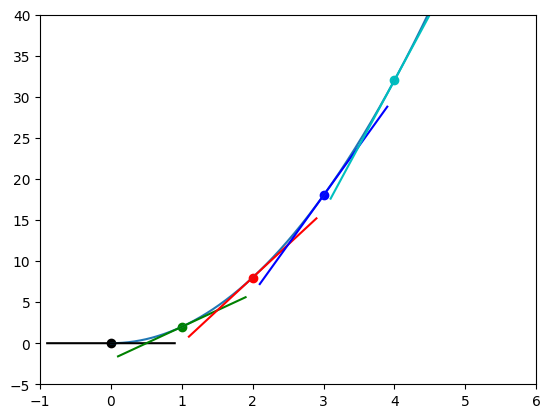

In [24]:
def f(x):
  return 2*x**2

x = np.arange(0, 50, 0.001)
y = f(x)

plt.plot(x,y)
colors = ['k','g','r','b','c']

def approximate_tangent_line(x, approximate_derivative, b):
  return approximate_derivative*x+b

for i in range(5):
  p2_delta = 0.0001
  x1 = i
  x2 = x1 + p2_delta

  y1 = f(x1)
  y2 = f(x2)

  print((x1, y1), (x2, y2))

  approximate_derivative = (y2-y1)/(x2-x1)
  b = y2 - approximate_derivative*x2

  to_plot = [x1-0.9, x1, x1+0.9]

  plt.scatter(x1, y1, c=colors[i])
  plt.plot(to_plot,
   [approximate_tangent_line(point, approximate_derivative, b)
    for point in to_plot],
    c=colors[i])

  print('Approximate derivative for f(x)', f'where x = {x1} is {approximate_derivative}')
plt.ylim(-5, 40)
plt.xlim(-1, 6)
plt.show()